<a href="https://colab.research.google.com/github/arabae/KaggleStudy/blob/main/Linear_Regression_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"baeara","key":"17862f3cfa90d1c9d843ef82361ab0d1"}'}

In [5]:
ls -1ha kaggle.json

kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        110           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        204           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        419           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2854           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      22361            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6000            True  
connectx

In [8]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.8MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 15.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.6MB/s]


# Boostcamp 강의 Kaggle로 실습하기!
Linear Regression 📈 House 🏡 price 💵 prediction - Fares Sayah

- USA_Housing dataset 사용
  - `Avg. Area Income`: 집이 있는 도시의 거주자들 수입
  - `Avg. Area House Age`: (같은 도시) 평균 주택 연식
  - `Avg. Area Number of Rooms`: (같은 도시) 주택의 평균 방 개수
  - `Avg. Area Number of Bedrooms`: (같은 도시) 주택의 평균 침실 수
  - `Area Population`: (같은 도시) 인구수
  - `Price`: 집이 팔린 가격
  - `Address`: 집주소

## Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")  # built-in themes (darkgrid, whitegrid, dark, white, ticks)가 있음
plt.style.use("fivethirtyeight") # 스타일 변경

### Check out the Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from google.colab import files
file_uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [17]:
import io
USAhousing = pd.read_csv(io.BytesIO(file_uploaded['USA_Housing.csv']))
USAhousing.head() # 상위 5개 출력

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [18]:
USAhousing.info() # 데이터에 대한 전박적인 정보확인 - 행과 열크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [19]:
USAhousing.describe() # 요약 통계량 확인하기 - 컬럼별 요약 통계량

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [20]:
USAhousing.columns # 컬럼명 확인

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Exploratory Data Analysis (EDA)
> 데이터 분석하기!

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


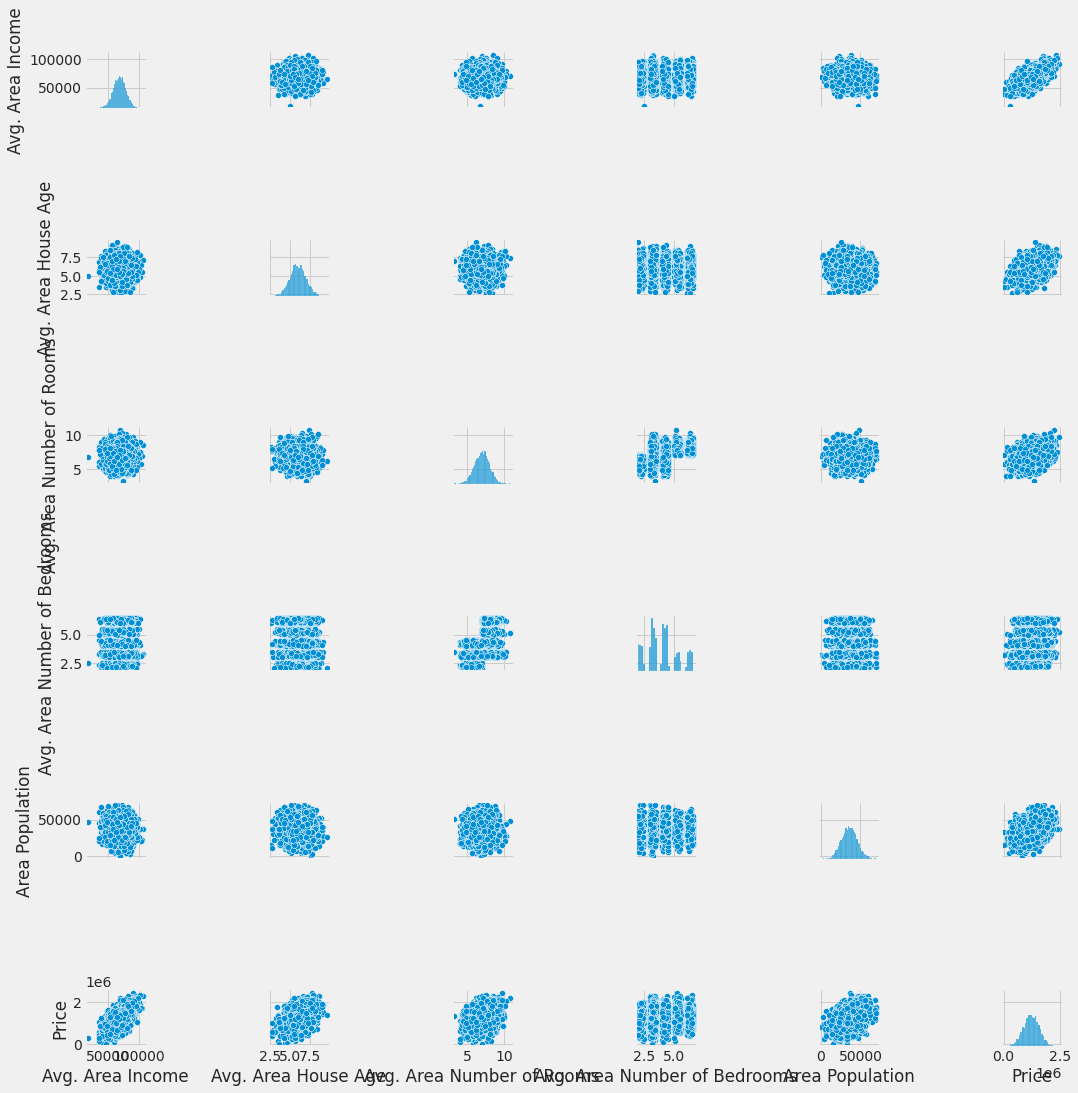

In [21]:
sns.pairplot(USAhousing) # 산점도 (데이터에 들어있는 각 열들의 모든 상관 관계를 출력)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


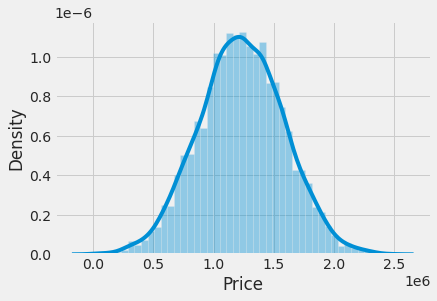

In [22]:
sns.distplot(USAhousing['Price']) # 히스토그램

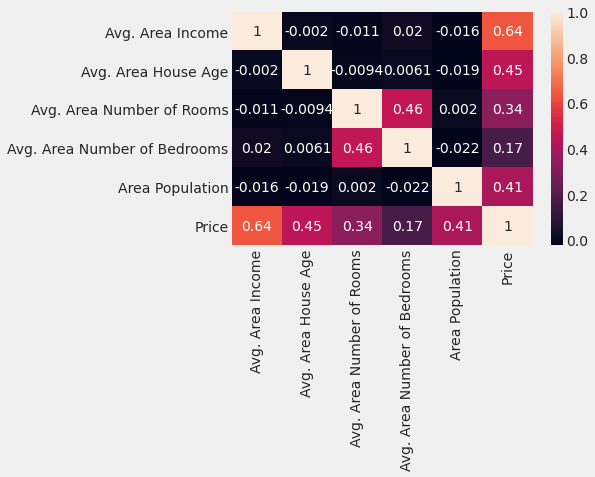

In [23]:
sns.heatmap(USAhousing.corr(), annot=True) # 색상으로 표현할 수 있는 다양한 정보를 표현 -> 데이터를 색상으로